# Examen

Dataset:
https://drive.google.com/file/d/1v6GNyAO4FDwTXct_4jqEFSnGYeqV2hKZ/view?usp=share_link


En un taller mecánico llamado "LOCOSmotores 2000", se lleva un registro de todas las reparaciones de autos que se realizan. La base de datos incluye información sobre el tipo de motor, la marca del auto, la cantidad de ruedas a reemplazar, la edad del auto, el signo del zoodiaco  del auto, la cantidad de kilómetros recorridos, y la fecha de elaboración del auto.

El taller esta compuesto por una variedad de personajes extraños, que tienen sus ideas sobre cómo reparar los autos, a cuales darles mayor importancia.

**A) Chequee cada una de estas hipotesis con gráficos y analisis de las distribuciones de las variables. (32pts)**

1. Pepe cree que cómo el auto más reparado en el taller fueron los Toyota, el taller se volvio más eficiente. (4pts/32pts)
2. "El Tuerca" tallerista antiguo, sostiene que los autos nuevos tiene muchas "mañas" y por lo tanto tardan muchisimo en repararse. -crea la variable "edad_del_auto" para verificar esta hipotesis. Tené en cuenta el año en que estas haciendo el examen.(4pts/32pts)
3. "Pistón", sostiene que depende del signo del zoodiaco, los autos de "sagitario", dice, son más divertidos, extrovertidos, tienen buena fortuna y son faciles conversadores, por lo tanto tardan menos en repararse.(4pts/32pts)
4. "El Oso", fanático de Elon Musk, sostiene que los autos eléctricos son los más eficientes y por lo tanto tardan menos en repararse.(4pts/32pts)
5. "Bujía", sostiene que los autos diesel son los más eficientes y por lo tanto tardan menos en repararse.(4pts/32pts)
6. "Inflador", sostiene que los autos con más de 50.000 km recorridos tardan más en repararse.(4pts/32pts)
7. "Gomón" está seguro que los autos que sólo le cambiaron 4 ruedas y son "electricos" tardan menos en repararse(4pts/32pts)
8. "Lovorne" Cree que los Ford con más Kms tardan menos en repararse.(4pts/32pts)

**B) Crear una hipotesis personal e intente verificarla con los datos.(8pts)**

Del estilo "Los autos Toyota de sagitario tardan menos en repararse"

**C) Cree un modelo de machine learning para predecir la variable que usted considera más importante, en función de las variables que usted considere. (30pts)** 
* Modelo (10 pts / 30pts)
* Verificar con el modelo lo siguiente:
    - "Valvula" Sostiene que la cantidad de ruedas a reemplazar no influye en nada.  (10pts / 30pts)
    - "Pistón" está tan peleado con "Inflador" y dice que necesita una prueba científica para que le demuestren que la variable cantidad_de_kilometros es representativa.(10pts / 30pts)


**D) Evalue el modelo mean_absolute_percentage_error. ¿Que significa? (5pts)**

**E) Interprete los coeficientes?. Cual es la intuición del modelo? Explique la formula que representa al modelo con tus palabras? Se verifica que la marca del auto impacta o que el tipo de motor y la edad impacta?(5pts)**

**F) Tengo fotos de accidentes de autos de una empresa de seguros. En las cuales actualmente cada perito de seguro evalua foto a foto: el valor de los daños que tiene el auto. Por ultimo luego de una evaluación minuciosa de muchas variables más que las fotos, el perito dictamina el probable costo a pagar por el total de las reparaciones.   (20pts)**
1. Explicar por qué resolverías esta tarea con Machine Learning.  (5pts / 20pts)
2. ¿Cuales crearías que son las variables que afectarían al modelo y por qué? (5pts / 20pts)
3. ¿Como la predicción impactaría al beneficio en el negocio de los seguros? (5pts / 20pts)
4. ¿Como se evaluaría la eficacia del modelo? (5pts / 20pts)


In [1]:
import numpy as np
import pandas as pd
import random

df = pd.read_csv("taller_mecanico.csv")

df.head()

,tiempo_de_reparacion,tipo_de_motor,marca_del_auto,cantidad_de_ruedas_a_reemplazar,signo_del_auto,cantidad_de_kilometros,fecha_de_elaboracion_del_auto
0,2406.0,gasolina,toyota,4,Piscis,81760,2002.0
1,2776.5,electrico,honda,3,Virgo,91959,1989.0
2,1122.0,diesel,honda,3,Acuario,82800,1998.0
3,639.0,gasolina,honda,4,Virgo,19724,2013.0
4,1494.0,electrico,honda,1,Acuario,36123,2006.0


# Solucion

Como mi target es tiempo_de_reparacion analizo primero esta variable para chequear que no tenga nulos ni outliers.

In [2]:
df['tiempo_de_reparacion'].isna().sum()

0

In [3]:
df['tiempo_de_reparacion'].describe()

count    3000.000000
mean     1678.956570
std      1035.642514
min        36.000000
25%       894.375000
50%      1491.000000
75%      2289.375000
max      5611.500000
Name: tiempo_de_reparacion, dtype: float64

/Users/federicomoreno/PycharmProjects/UCEMA/venv/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


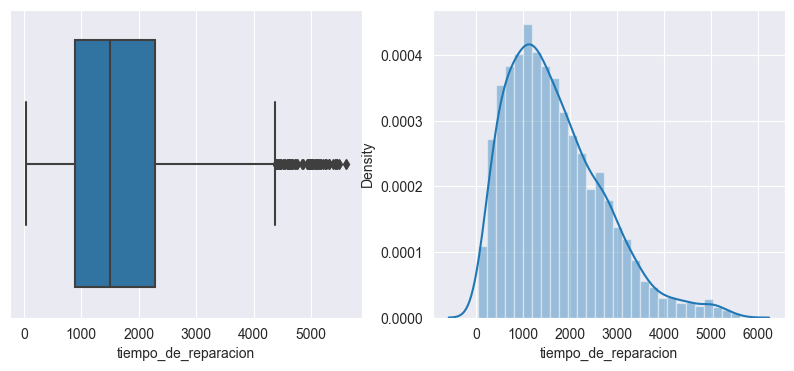

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 2, figsize=(10, 4))
sns.boxplot(x=df['tiempo_de_reparacion'], ax=ax[0])
sns.distplot(df['tiempo_de_reparacion'], ax=ax[1])
plt.show()

In [5]:
(df['tiempo_de_reparacion'].max()/24)

233.8125

In [6]:
(df['tiempo_de_reparacion'].max()/24)/30

7.79375

In [7]:
df['tiempo_de_reparacion'].min()

36.0

La forma de la distribución tiene mucho sentido. No hay autos que se tarde 0 horas, el valor minimo es 36horas, es decir un día y medio. Si hay valores atipicos. Un auto que tardó 233 días, esto es más de 7 meses. Ahora bien no necesariamente es un outlier. La distribución tiene una leve asimetria a derecha pero se asemeja a una normal.

In [8]:
df['tiempo_de_reparacion'].quantile(0.9)

3053.475

Cómo al décil 90 los datos se encuentran menores a 3053, una opción para el modelo será aplicarle .clip y hacer que todos los valores mayores a ese número sean iguales a este mismo.



**A) Chequee cada una de estas hipotesis con gráficos y analisis de las distribuciones de las variables. (32pts)**

1. Pepe cree que cómo el auto más reparado en el taller fueron los Toyota, el taller se volvio más eficiente. (4pts/32pts)

In [9]:
#cual es la marca de auto más usada.
df['marca_del_auto'].value_counts()

ford      1017
honda     1014
toyota     969
Name: marca_del_auto, dtype: int64

In [10]:
#groupby por marca de auto y hacer el valor promedio de tiempo de reparacion
df.groupby('marca_del_auto')['tiempo_de_reparacion'].mean()


marca_del_auto
ford      1568.632575
honda     1713.712426
toyota    1758.375624
Name: tiempo_de_reparacion, dtype: float64

Pepe está equivocado en el taller los autos más reparados fueron de marca Ford y no toyota. Pero sí es cierto que el tiempo promedio de reparación fue menor en el auto más reparado. Aunque si vemos en porcentajes las propociones son bastante similares, lo suficiente cómo para afirmar que no hay un "auto más reparado"

In [11]:
df['marca_del_auto'].value_counts(normalize=True)

ford      0.339
honda     0.338
toyota    0.323
Name: marca_del_auto, dtype: float64

2. "El Tuerca" tallerista antiguo, sostiene que los autos nuevos tiene muchas "mañas" y por lo tanto tardan muchisimo en repararse. -crea la variable "edad_del_auto" para verificar esta hipotesis.(4pts/32pts)

In [12]:
#crear edad de l auto a partir de fecha de elaboracion del auto
df['edad_del_auto'] = 2022 - df['fecha_de_elaboracion_del_auto']
df['edad_del_auto'].describe()

count    2989.000000
mean       22.530278
std        11.887729
min       -34.000000
25%        13.000000
50%        23.000000
75%        32.000000
max        42.000000
Name: edad_del_auto, dtype: float64

La edad del auto no puede ser negativa por lo tanto filtro el dataset

In [13]:
df = df[df['edad_del_auto']>0]

In [14]:
df['edad_del_auto'].value_counts(bins=5)

(18.6, 26.4]    632
(26.4, 34.2]    606
(34.2, 42.0]    592
(10.8, 18.6]    588
(2.96, 10.8]    560
Name: edad_del_auto, dtype: int64

Creo una copia del dataset para luego usar en el modelo

In [15]:
df1 = df.copy()

/Users/federicomoreno/PycharmProjects/UCEMA/venv/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


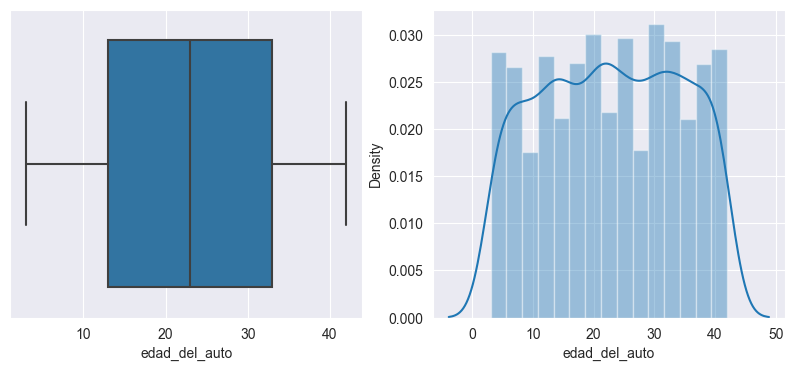

In [16]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4))
sns.boxplot(x=df['edad_del_auto'], ax=ax[0])
sns.distplot(df['edad_del_auto'], ax=ax[1])
plt.show()

Dado que no hay que hacer más transformaciones verifico la hipotesis hay dos maneras de hacerlo. Correlación o discretizar y ver la media de cada bin

**Opcion 1**

In [17]:
#opcion1
df['edad_del_auto'].corr(df['tiempo_de_reparacion'])

0.10673525206261229

**Opcion 2**

In [18]:
#discretizar la variable edad del auto y crear una nueva columna
df['edad_del_auto_discretizada'] = pd.cut(df['edad_del_auto'], bins=5)
#opcion2
df.groupby('edad_del_auto_discretizada')['tiempo_de_reparacion'].mean()

edad_del_auto_discretizada
(2.961, 10.8]    1506.981075
(10.8, 18.6]     1600.289410
(18.6, 26.4]     1689.863884
(26.4, 34.2]     1789.321231
(34.2, 42.0]     1795.762758
Name: tiempo_de_reparacion, dtype: float64

En cada bin de edad del auto se observa que a menor es el intervalo menor es el tiempo de reparación. Esto mismo puede ser observado con la correlación poistiva y del 10% entre edad_de_auto y tiempo, significa que cuando aumenta la edad del auto en 1 año, el tiempo de reparacion aumenta en 10%.

Por lo tanto la hipotesis de Tuerca es exactamente la opuesta a lo que el intuye

3. "Pistón", sostiene que depende del signo del zoodiaco, los autos de "sagitario", dice, son más divertidos, extrovertidos, tienen buena fortuna y son faciles conversadores, por lo tanto tardan menos en repararse

In [19]:
df.groupby('signo_del_auto')['tiempo_de_reparacion'].agg(['mean', 'median','min','max','std', 'count'])

,mean,median,min,max,std,count
signo_del_auto,,,,,,
Acuario,1767.614583,1552.4400,78.00,5382.000,1105.461659,252
Aries,1787.352427,1660.8000,132.00,5202.000,1101.759026,239
Cancer,1680.052441,1592.5000,72.00,4631.175,907.193817,256
Capricornio,1643.417906,1470.2400,147.00,5251.500,1028.588057,265
Escorpio,1727.389247,1572.0000,145.44,5258.250,1068.798697,239
Géminis,1679.675603,1426.8375,52.80,5483.250,1139.830161,232
Leo,1712.296940,1526.4000,49.50,5303.250,1094.817646,250
Libra,1711.150000,1537.5000,128.40,5445.000,983.788483,217
Piscis,1683.971055,1461.6000,83.70,5440.500,1056.206555,275


Es cierto que la distribución de sagitario es la que tiene menor media, menor mediana y menor valor máximo y menor desvio, sumado al hecho que todos los valores están igualmente representados. Podía querer afirmar que Pistón tiene razón. Pero estoy encontrando una relación absurda, el signo del auto no tiene ninguna relación con nada, de casualidad en estos datos da de esta manera. Por lo tanto si bien chequeo su hipotesis en los datos, no puedo darla cómo afirmativa.

4. "El Oso", fanático de Elon Musk, sostiene que los autos eléctricos son los más eficientes y por lo tanto tardan menos en repararse.(4pts/32pts)

In [20]:
df.groupby('tipo_de_motor')['tiempo_de_reparacion'].agg(['mean', 'median','min','max','std', 'count'])

,mean,median,min,max,std,count
tipo_de_motor,,,,,,
diesel,1243.672789,1189.656,42.4,3030.0,672.915472,984
electrico,2250.129844,2134.500,58.5,5611.5,1220.734617,992
gasolina,1541.308323,1420.350,36.0,3774.0,861.945067,1002


<AxesSubplot:xlabel='tipo_de_motor', ylabel='tiempo_de_reparacion'>

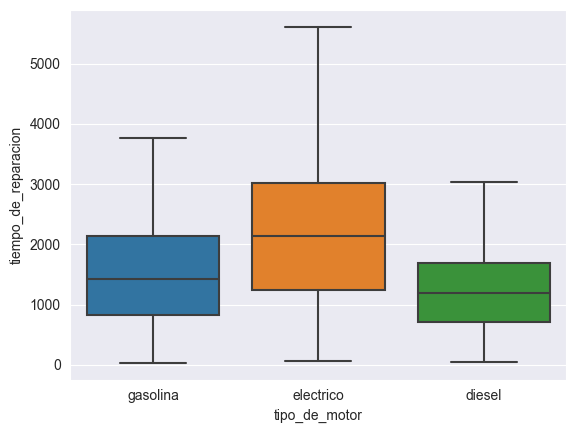

In [21]:
sns.boxplot(x='tipo_de_motor', y='tiempo_de_reparacion', data=df)

En el boxplot se verifica la hipotesis contraria. Los autos electircos tienen una distribución que tiende a un mayor tiempo de reparacion

5. "Bujía", sostiene que los autos diesel son los más eficientes y por lo tanto tardan menos en repararse.(4pts/32pts)


La hipoteiss de Bujía se visualiza en el anterior boxplot. La distribución diesel tiene una menor media, una menor mediana y un desvio más pequeño, por lo que hay evidencia que sostiene la hipotesis de Bujía.

6. "Inflador", sostiene que los autos con más de 50.000 km recorridos tardan más en repararse.(4pts/32pts)


In [22]:
#opcion1
df['cantidad_de_kilometros'].corr(df['tiempo_de_reparacion'])

0.023334257558320186

In [23]:
df["mas_de_50000_kilometros"] = df['cantidad_de_kilometros'].apply(lambda x: True if x > 50000 else False)

df.groupby('mas_de_50000_kilometros')['tiempo_de_reparacion'].agg(['mean', 'median','min','max','std', 'count'])

,mean,median,min,max,std,count
mas_de_50000_kilometros,,,,,,
False,1344.468233,1248.8,36.0,3781.5,770.870988,1502
True,2019.581628,1890.0,128.4,5611.5,1153.737304,1476


La hipotesis tiene sentido con lo que cualquier persona pensaría. Los autos que tienen más uso tienen por lo general más fallas. Si analizamos las correlación es muy pequeña, sin embargo es positiva. Es decir tienen la misma dirección creciente, y analizando los autos con mas kms que 50mil vemos que el tiempo promedio es de 2019 horas cuando en menos de 50k km es de menos, approx 1344.

7. "Gomón" está seguro que los autos que sólo le cambiaron cuatros ruedas y son "electricos" tardan menos en repararse(4pts/32pts)


In [24]:
df['una_sola_rueda'] = df['cantidad_de_ruedas_a_reemplazar'].apply(lambda x: True if x == 4 else False)
df.groupby(['una_sola_rueda', 'tipo_de_motor'])['tiempo_de_reparacion'].agg(['mean', 'median','min','max','std', 'count'])

mean   median   min     max          std  \
una_sola_rueda tipo_de_motor                                                    
False          diesel         1235.278338  1178.96  42.4  2961.6   671.950629   
               electrico      2240.491943  2133.00  58.5  5611.5  1198.675869   
               gasolina       1520.458630  1381.50  36.0  3774.0   863.593498   
True           diesel         1266.805588  1251.68  93.6  3030.0   676.315435   
               electrico      2279.836790  2180.25  83.7  5251.5  1288.462813   
               gasolina       1599.294075  1558.50  72.0  3589.5   856.297218   

                              count  
una_sola_rueda tipo_de_motor         
False          diesel           722  
               electrico        749  
               gasolina         737  
True           diesel           262  
               electrico        243  
               gasolina         265

Habiamos verificado que los autos electricos tardaban más, esto puede verse también con distintas cantidades de ruedas, que con más ruedas a cambiar. Ahora bien además, aunque la correlación es baja, es positiva entre cantidad_de_ruedas_a_reemplazar. Por lo tanto además sería aún mayor el tiempo que tarda

In [25]:
df['cantidad_de_ruedas_a_reemplazar'].corr(df['tiempo_de_reparacion'])

0.018872216844082596

8. "Lovorne" Cree que los Ford con más Kms tardan menos en repararse.(4pts/32pts)

In [26]:
#otra manera de hacerlo
df.groupby('marca_del_auto')['tiempo_de_reparacion'].agg(['mean', 'median', 'count'])

,mean,median,count
marca_del_auto,,,
ford,1567.762971,1401.30,1006
honda,1715.749196,1508.55,1008
toyota,1756.897334,1576.30,964


Los fords tardan menos en repararse ahora bien que pasa con los kms y los fords

In [27]:
df_ford = df[df["marca_del_auto"]=="ford"]
df_ford['cantidad_de_kilometros'].corr(df['tiempo_de_reparacion'])

0.04631933757812927

La relación sigue siendo la misma, a mayor cant de kms mayor es el tiempo de recuperación. Por lo tanto la hipotesis es falsa.

**B) Crear una hipotesis personal e intente verificarla con los datos.(8pts)**

Del estilo "Los autos Toyota de sagitario tardan menos en repararse"

Los toyota que tienen una sola rueda a cambiar tardan menos tiempo en repararse

In [28]:
#crear una variable para ver si tiene una sola rueda a cambiar o no
df['una_sola_rueda'] = df['cantidad_de_ruedas'].apply(lambda x: True if x == 1 else False)
#verificar si los autos que tienen para cambiar una rueda y son toyota tardan menos en repararse
df.loc[(df['una_sola_rueda'] == True) & (df['marca_del_auto'] == 'toyota'), 'tiempo_de_reparacion'].mean()

1720.2692

In [29]:
df['tiempo_de_reparacion'].mean()

1679.0778270651444

La media es más alta que la población por lo tanto la hipotesis no tiene fundamentos


**C) Cree un modelo de machine learning para predecir la variable que usted considera más importante, en función de las variables que usted considere. (30pts)**
* Modelo (10 pts / 30pts)
* Verificar con el modelo lo siguiente:
    - "Valvula" Sostiene que la cantidad de ruedas a reemplazar no influye en nada.  (10pts / 30pts)
    - "Pistón" está tan peleado con "Inflador" y dice que necesita una prueba científica para que le demuestren que la variable cantidad_de_kilometros es representativa.(10pts / 30pts)


In [30]:
columnas_seleccionadas = [
 'tipo_de_motor',
 'marca_del_auto',
 'cantidad_de_ruedas_a_reemplazar',
 'cantidad_de_kilometros',
 'edad_del_auto','tiempo_de_reparacion']



import statsmodels.api as sm
#instanciar el modelo
modelo = sm.OLS.from_formula('tiempo_de_reparacion ~ C(tipo_de_motor) + C(marca_del_auto) + cantidad_de_ruedas_a_reemplazar + cantidad_de_kilometros + edad_del_auto', data=df)
#entrenar el modelo
modelo_entrenado = modelo.fit()
#ver los resultados
modelo_entrenado.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     tiempo_de_reparacion   R-squared:                       0.185
Model:                              OLS   Adj. R-squared:                  0.183
Method:                   Least Squares   F-statistic:                     96.24
Date:                  Thu, 15 Dec 2022   Prob (F-statistic):          5.51e-127
Time:                          11:42:49   Log-Likelihood:                -24597.
No. Observations:                  2978   AIC:                         4.921e+04
Df Residuals:                      2970   BIC:                         4.926e+04
Df Model:                             7                                         
Covariance Type:              nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                         847.3407     64.414     13.155      0.000     721.041     973.641
C(tipo_de_motor)[T.electrico]    1011.7842     42.147     24.006      0.000     929.144    1094.425
C(tipo_de_motor)[T.gasolina]      307.0567     42.040      7.304      0.000     224.626     389.488
C(marca_del_auto)[T.honda]        145.7859     41.786      3.489      0.000      63.853     227.719
C(marca_del_auto)[T.toyota]       191.7816     42.230      4.541      0.000     108.978     274.585
cantidad_de_ruedas_a_reemplazar    20.5008     15.220      1.347      0.178      -9.342      50.344
cantidad_de_kilometros           2.915e-07   3.35e-07      0.871      0.384   -3.65e-07    9.48e-07
edad_del_auto                      10.0365      1.507      6.661      0.000       7.082      12.991
==============================================================================
Omnibus:                      110.944   Durbin-Watson:                   2.036
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              122.922
Skew:                           0.497   Prob(JB):                     2.03e-27
Kurtosis:                       3.064   Cond. No.                     2.21e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.21e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Dado que el p-valor es mayor a 0.05 no existen hipotesis para afirmar que las variables cantidad_de_ruedas y cantdad_de_kilometros impacten la variable. Tanto Válvula cómo Pistón tienen razón, no hay pruebas para afirmarlo

In [31]:
modelo = sm.OLS.from_formula('tiempo_de_reparacion ~ C(tipo_de_motor) + C(marca_del_auto)  + edad_del_auto', data=df)
#entrenar el modelo
modelo_entrenado = modelo.fit()
#ver los resultados
modelo_entrenado.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     tiempo_de_reparacion   R-squared:                       0.184
Model:                              OLS   Adj. R-squared:                  0.183
Method:                   Least Squares   F-statistic:                     134.2
Date:                  Thu, 15 Dec 2022   Prob (F-statistic):          1.48e-128
Time:                          11:42:49   Log-Likelihood:                -24598.
No. Observations:                  2978   AIC:                         4.921e+04
Df Residuals:                      2972   BIC:                         4.924e+04
Df Model:                             5                                         
Covariance Type:              nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                       899.6998     51.582     17.442      0.000     798.560    1000.840
C(tipo_de_motor)[T.electrico]  1012.2309     42.140     24.021      0.000     929.605    1094.857
C(tipo_de_motor)[T.gasolina]    306.9524     42.044      7.301      0.000     224.513     389.391
C(marca_del_auto)[T.honda]      143.1283     41.758      3.428      0.001      61.251     225.006
C(marca_del_auto)[T.toyota]     189.6985     42.214      4.494      0.000     106.928     272.470
edad_del_auto                    10.0735      1.507      6.685      0.000       7.119      13.028
==============================================================================
Omnibus:                      110.928   Durbin-Watson:                   2.035
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              122.921
Skew:                           0.497   Prob(JB):                     2.03e-27
Kurtosis:                       3.059   Cond. No.                         99.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**D) Evalue el modelo (5pts)**

In [32]:
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(df['tiempo_de_reparacion'], modelo_entrenado.predict(df[columnas_seleccionadas]))

0.8978824386470691

El mean_absolute_percentage_error (MAPE), también conocido como error porcentual medio absoluto, es una métrica de evaluación utilizada en modelos de regresión. Se calcula como la media del porcentaje absoluto de error entre las predicciones del modelo y los valores reales para cada uno de los ejemplos en el conjunto de datos. Matemáticamente, se define como:

MAPE = (1/n) * Σ |(y - y')| / y

donde n es el número de ejemplos en el conjunto de datos, y y y' son el valor real y la predicción del modelo para el ejemplo i-ésimo respectivamente. El MAPE se utiliza para evaluar la precisión del modelo y se expresa en términos porcentuales. Un modelo con un MAPE bajo se considera más preciso que un modelo con un MAPE alto

**E) Interprete los resultados. Cual es la intuición del modelo? Explique la formula que representa al modelo con tus palabras? Se verifican las hipotesis?(5pts)**



La regresión lineal mostrada tiene como objetivo predecir el valor de los daños en un auto después de un accidente en base a distintas variables. La variable "Intercept" representa el valor del daño esperado en el caso de que todas las otras variables estén en su valor mínimo o nulo. La variable "C(tipo_de_motor)[T.electrico]" representa el efecto del tipo de motor eléctrico en el valor del daño, y "C(tipo_de_motor)[T.gasolina]" representa el efecto del tipo de motor de gasolina en el valor del daño. Las variables "C(marca_del_auto)[T.honda]" y "C(marca_del_auto)[T.toyota]" representan el efecto de la marca del auto en el valor del daño, en este caso Honda y Toyota respectivamente. Finalmente, la variable "edad_del_auto" representa el efecto de la edad del auto en el valor del daño. Los valores asociados a cada una de estas variables indican el aumento o disminución esperado en el valor del daño en base a cada una de ellas. Por ejemplo, se espera que un auto con motor eléctrico tenga un valor de daño 1012.230904 mayor que un auto con cualquier otro tipo de motor.




**F) Tengo fotos de accidentes de autos de una empresa de seguros. En las cuales actualmente cada perito de seguro evalua foto a foto: el valor de los daños que tiene el auto. Por ultimo luego de una evaluación minuciosa de muchas variables más que las fotos, el perito dictamina el probable costo a pagar por el total de las reparaciones.   (20pts)**
1. Explicar por qué resolverías esta tarea con Machine Learning.  (5pts / 20pts)
2. ¿Cuales crearías que son las variables que afectarían al modelo y por qué? (5pts / 20pts)
3. ¿Como la predicción impactaría al beneficio en el negocio de los seguros? (5pts / 20pts)
4. ¿Como se evaluaría la eficacia del modelo? (5pts / 20pts)

1. Una posible razón para resolver esta tarea con Machine Learning es que el uso de un modelo de aprendizaje automático podría permitir hacer predicciones precisas y rápidas del valor de los daños en un auto después de un accidente. Esto podría mejorar la eficiencia y la precisión de la evaluación en comparación con la evaluación manual realizada por los peritos de seguros. Además, el modelo podría aprender a partir de datos históricos y mejorar su precisión con el tiempo.

2. Algunas variables que podrían afectar al modelo podrían ser el tipo de auto, la edad del auto, la gravedad del accidente, la calidad de las fotos, entre otros. Estas variables podrían influir en la precisión de la predicción del valor de los daños en el auto, ya que cada una de ellas puede tener un impacto en el costo total de reparación.

3. La predicción del valor de los daños en un auto después de un accidente podría tener un impacto positivo en el beneficio del negocio de los seguros ya que podría ayudar a determinar de manera más precisa el costo de las reparaciones. Esto podría permitir a la empresa de seguros fijar primas más justas y ajustadas, lo que podría aumentar su beneficio en el largo plazo.

4. La eficacia del modelo se podría evaluar utilizando métricas de evaluación de modelos de regresión, como el error cuadrático medio (RMSE) o el porcentaje absoluto de error medio (MAPE). Estas métricas se podrían calcular comparando los resultados del modelo con el valor real de los daños en el auto después del accidente. Además, también se podría comparar la precisión del modelo con la evaluación realizada por los peritos de seguros para medir su eficacia en comparación con la evaluación manual.
